# citysong

an agent-based approach to modeling urban birdsong

#### import statements

In [1]:
import numpy
from matplotlib import pyplot
from scipy.ndimage import uniform_filter

#### variable declarations

In [2]:
width = 1000
height = 1000

In [3]:
seconds = 30

In [4]:
n_trees = 1000
n_birds = 50

In [5]:
cmp = numpy.zeros((width, height))
trees = numpy.zeros((width, height))
index = numpy.arange(0, width * height)

#### create maps

In [6]:
index_coords = numpy.zeros((width * height, 2))

In [7]:
x = 0
for r in range(height):
    for c in range(width):
        index_coords[x] = [r, c]
        x = x + 1

In [8]:
tree_coords = numpy.random.randint(low=0, high=999, size=(n_trees, 2))
tree_coords_index = numpy.arange(len(tree_coords), dtype=int)
for tree in tree_coords:
    trees[tree[0], tree[1]] = 1

In [9]:
birds = numpy.zeros((n_birds, 2))
for idx, b in enumerate(birds):
    i = numpy.random.choice(tree_coords_index)
    birds[idx] = tree_coords[i]

In [10]:
suitability = uniform_filter(trees, size=25)
suitability = suitability + abs(suitability.min())
suitability_sort = numpy.sort(suitability.ravel())
suitability_sort = suitability_sort/suitability_sort.sum()

## plot habitat

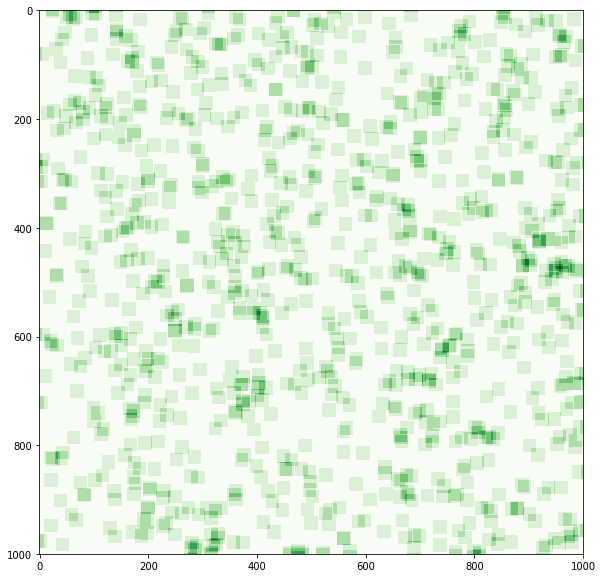

In [11]:
figure, ax = pyplot.subplots()
figure.set_figheight(10)
figure.set_figwidth(10)

ax.imshow(suitability, cmap="Greens")

## run simulation

In [12]:
for s in range(seconds):
    for idx, b in enumerate(birds):
        move = numpy.random.randint(0, 100)
        if move > 50:
            sample = numpy.random.choice(index, p=suitability_sort)
            birds[idx] = index_coords[sample]
        call = numpy.random.randint(0, 100)
        if call > 60:
            cmp[int(b[0]), int(b[1])] = 1

## plot bird calls

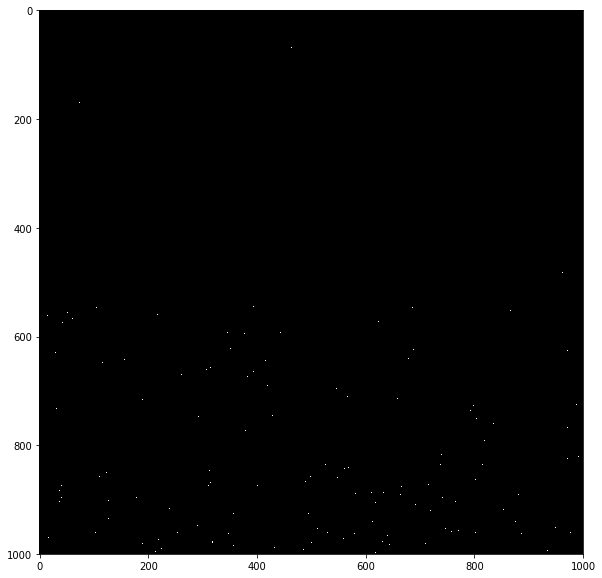

In [13]:
figure, ax = pyplot.subplots()
figure.set_figheight(10)
figure.set_figwidth(10)

ax.imshow(cmp, cmap="gray")